## Dragon Real estates price predictor


In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
# housing.head()

In [4]:
# housing.info()

In [5]:
# housing['CHAS'].value_counts()

In [6]:
# housing.describe()

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
# housing.hist(bins = 50, figsize =( 20,15))

## Train Test  Splitting

In [10]:
# for training purpose
def split_test_training(data,test_ratio):
    np.randon.seed(42)
    shuffled = np.random.permutation(len(data)) #shuffle data set
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    training_indies = shuffled[test_set_size:]
#     print(data.iloc[training_indies], data.iloc[test_indices])
    return data.iloc[training_indies], data.iloc[test_indices]

In [11]:
# train_test, test_set = split_test_training(housing,0.2)

In [12]:
# print(f'Rows in train set: {len(train_test)}\n Rows in test set: {len(test_set)}')

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f'Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}')

Rows in train set: 404
 Rows in test set: 102


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, random_state = 42, test_size = 0.2)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [16]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
housing = strat_train_set.copy()

## Looking for co-relations

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [20]:
# 1 means strong +ve corelation / dependency to increase if other feature increase

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

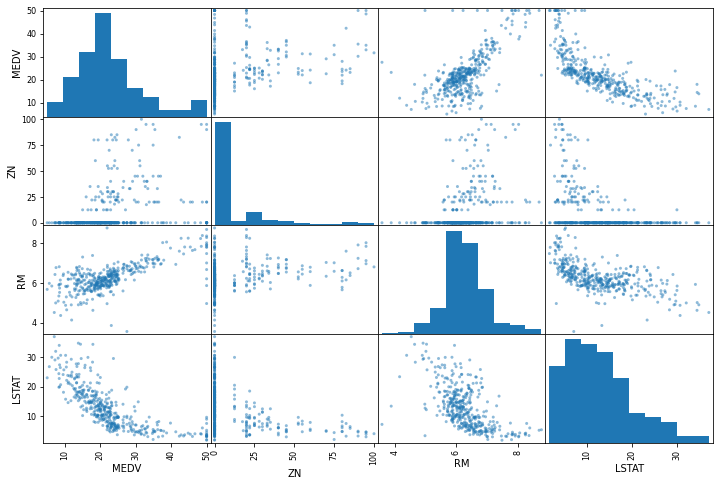

In [21]:
from pandas.plotting import scatter_matrix
attr = ['MEDV','ZN', 'RM','LSTAT']
scatter_matrix(housing[attr],figsize = (12,8)) #shows corelation and values

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

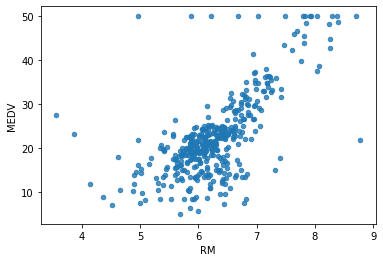

In [22]:
housing.plot(kind = 'scatter', x = "RM",y = "MEDV", alpha = 0.8)

## Trying attribute combination

In [23]:
housing['TAXRM'] = housing["TAX"]/housing["RM"]

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

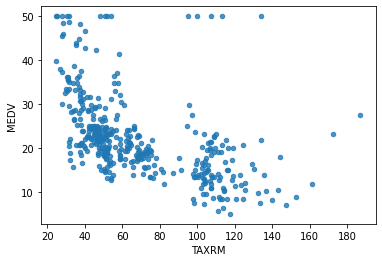

In [26]:
housing.plot(kind = 'scatter', x = "TAXRM",y = "MEDV", alpha = 0.8)

In [27]:
housing = strat_train_set.drop('MEDV',axis = 1)
housing_labels = strat_train_set['MEDV'].copy()

## missing attributes

In [28]:
# deal with missing attributes:
#     1.get rid of missing data points
#     2.get rid of the whole attributes
#     3.set value to 0 or mean or median

In [29]:
# a = housing.dropna(subset = ['RM'],inplace = True)#option 1
# housing.drop("RM",axis = 1)#Otion2

# median = housing['RM'].median()
# housing['RM'].fillna(median)#option 3

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns =housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# creating pipeline

In [32]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])
my_pipeline.fit_transform(housing)


array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [33]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

## Selecting a desired model 

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
model = RandomForestRegressor()
# model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [35]:
some_data = housing.iloc[:5]
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [36]:
some_label = housing_labels[:5]
some_label

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [37]:
prepared_data = my_pipeline.transform(some_data)

In [38]:
model.predict(prepared_data)

array([22.239, 25.274, 16.594, 23.209, 23.575])

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)
rmse

1.198658728548185

## Using beter evalution technique - cross validation

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr,housing_labels, scoring = 'neg_mean_squared_error',cv = 10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.90789588, 2.77357621, 4.39058353, 2.6220956 , 3.37760853,
       2.57522055, 4.62199483, 3.25397065, 3.07556156, 3.09930245])

In [41]:
def print_scores(scores):
    print("Scores",scores)
    print('Mean',scores.mean())
    print('STD',scores.std())

In [42]:
print_scores(rmse_scores)

Scores [2.90789588 2.77357621 4.39058353 2.6220956  3.37760853 2.57522055
 4.62199483 3.25397065 3.07556156 3.09930245]
Mean 3.2697809795374466
STD 0.6665157215509965


## Saving the model

In [43]:
from joblib import dump,load

In [44]:
dump(model,'Dragon.joblib')

['Dragon.joblib']

## testing on test data

In [46]:
x_test = strat_test_set.drop('MEDV', axis = 1)
Y_test = strat_test_set['MEDV'].copy()

x_test_prepared = my_pipeline.transform(x_test)
final_prediction = model.predict(x_test_prepared)
final_mse = mean_squared_error(Y_test,final_prediction)
final_rmse = np.sqrt(final_mse)

In [47]:
final_rmse

2.9178186604540923

In [48]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])